In [3]:
# NOTE: You don't need to edit this code.
import time
import tensorflow as tf
import numpy as np
from scipy.misc import imread
from caffe_classes import class_names
from alexnet import AlexNet


# placeholders
x = tf.placeholder(tf.float32, (None, 227, 227, 3))

# By keeping `feature_extract` set to `False`
# we indicate to keep the 1000 class final layer
# originally used to train on ImageNet.
probs = AlexNet(x, feature_extract=False)
#init = tf.global_variables_initializer() # This line is not supported in this tensorflow version
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Read Images
im1 = (imread("poodle.png")[:, :, :3]).astype(np.float32)
im1 = im1 - np.mean(im1)

im2 = (imread("weasel.png")[:, :, :3]).astype(np.float32)
im2 = im2 - np.mean(im2)

# Run Inference
t = time.time()
output = sess.run(probs, feed_dict={x: [im1, im2]})

# Print Output
for input_im_ind in range(output.shape[0]):
    inds = np.argsort(output)[input_im_ind, :]
    print("Image", input_im_ind)
    for i in range(5):
        print("%s: %.3f" % (class_names[inds[-1 - i]], output[input_im_ind, inds[-1 - i]]))
    print()

print("Time: %.3f seconds" % (time.time() - t))


Image 0
miniature poodle: 0.389
toy poodle: 0.223
Bedlington terrier: 0.173
standard poodle: 0.150
komondor: 0.026

Image 1
weasel: 0.331
polecat, fitch, foulmart, foumart, Mustela putorius: 0.280
black-footed ferret, ferret, Mustela nigripes: 0.210
mink: 0.081
Arctic fox, white fox, Alopex lagopus: 0.027

Time: 0.190 seconds


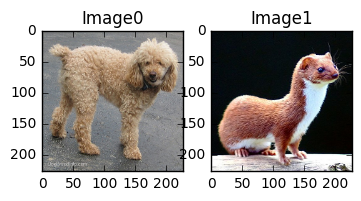

In [4]:
import pylab as plt
%matplotlib inline

image0 = imread("poodle.png")
image1 = imread("weasel.png")

plt.figure(1, figsize=(4,4))

plt.subplot("121")
plt.imshow(image0)
_ = plt.title("Image0")

plt.subplot("122")
plt.imshow(image1)
_ = plt.title("Image1")